<a href="https://colab.research.google.com/github/shrishatuladhar/AI-ML/blob/main/ShrishaTuladhar_Worksheet04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Shrisha Tuladhar
Group: L6CG7

**WORKSHOP AND WORKSHEET 5**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


WORKSHOP 4

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28*28, )
model = keras.Sequential(
[
keras.layers.Input(shape=input_shape),
keras.layers.Flatten(),
keras.layers.Dense(64, activation="sigmoid"),
keras.layers.Dense(128, activation="sigmoid"),
keras.layers.Dense(256, activation="sigmoid"),
keras.layers.Dense(num_classes, activation="softmax"),
]
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
optimizer="sgd",
loss="categorical_crossentropy",
metrics=["accuracy"]
)

In [ ]:
batch_size = 128
epochs = 100

callbacks = [
keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
]

history = model.fit(
x_train,
y_train,
batch_size=batch_size,
epochs=epochs,
validation_split=0.15,
callbacks=callbacks,
)

Epoch 1/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8782 - loss: 0.4522 - val_accuracy: 0.8862 - val_loss: 0.4088
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8782 - loss: 0.4428 - val_accuracy: 0.8873 - val_loss: 0.4047
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8785 - loss: 0.4492 - val_accuracy: 0.8894 - val_loss: 0.4010
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8804 - loss: 0.4333 - val_accuracy: 0.8894 - val_loss: 0.3977
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8840 - loss: 0.4236 - val_accuracy: 0.8909 - val_loss: 0.3925
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8829 - loss: 0.4321 - val_accuracy: 0.8913 - val_loss: 0.3896
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8821 - loss: 0.4264 - val_accuracy: 0.8919 - val_loss: 0.3855
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8857 - loss: 0.4170 - val_accu

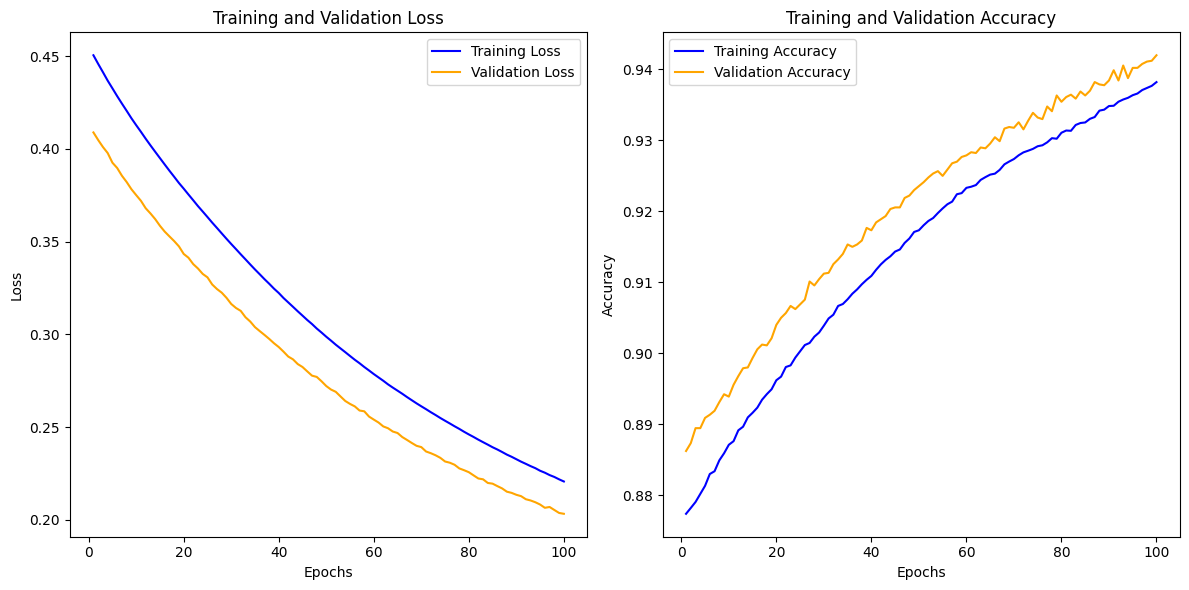

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9382 - loss: 0.2219
Test accuracy: 0.9382


# WORKSHEET 4

## Devanagari Digit Classification with Fully Connected Network (FCN)

Task 1: Data Preparation

Found classes: ['digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']
Loading class digit_0 (label 0)...
Loading class digit_1 (label 1)...
Loading class digit_2 (label 2)...
Loading class digit_3 (label 3)...
Loading class digit_4 (label 4)...
Loading class digit_5 (label 5)...
Loading class digit_6 (label 6)...
Loading class digit_7 (label 7)...
Loading class digit_8 (label 8)...
Loading class digit_9 (label 9)...
Loaded 17000 images from /content/drive/MyDrive/Ai ML/Week4/DevanagariHandwrittenDigitDataset/Train
Found classes: ['digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']
Loading class digit_0 (label 0)...
Loading class digit_1 (label 1)...
Loading class digit_2 (label 2)...
Loading class digit_3 (label 3)...
Loading class digit_4 (label 4)...
Loading class digit_5 (label 5)...
Loading class digit_6 (label 6)...
Loading class digit_7 (label 7)...
Loading class digi

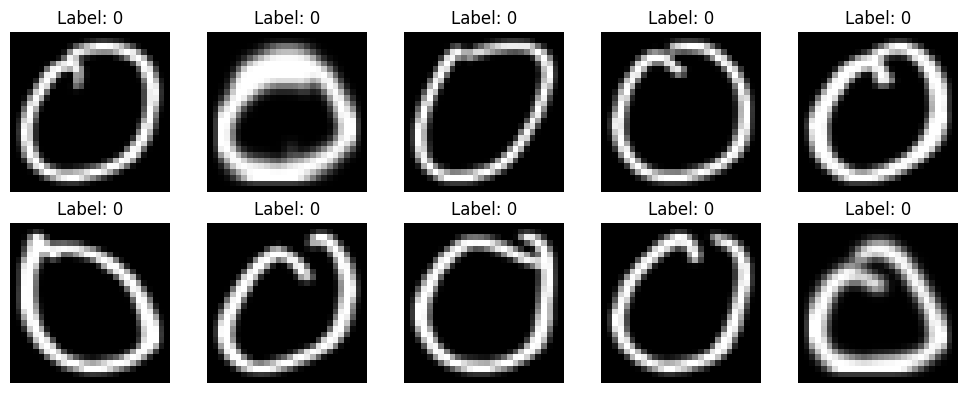

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image

train_dir = "/content/drive/MyDrive/Ai ML/Week4/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/drive/MyDrive/Ai ML/Week4/DevanagariHandwrittenDigitDataset/Test"

if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Train directory not found: {train_dir}")
if not os.path.exists(test_dir):
    raise FileNotFoundError(f"Test directory not found: {test_dir}")

img_height, img_width = 28, 28

def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted([d for d in os.listdir(folder) if os.path.isdir(os.path.join(folder, d))])

    if not class_names:
        raise ValueError(f"No subdirectories found in {folder}")

    print(f"Found classes: {class_names}")
    class_map = {name: i for i, name in enumerate(class_names)}

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]
        print(f"Loading class {class_name} (label {label})...")

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)

            try:
                img = Image.open(img_path).convert("L")
                img = img.resize((img_width, img_height))
                img_array = np.array(img) / 255.0

                if img_array.shape != (img_height, img_width):
                    print(f"Warning: Image {img_path} has shape {img_array.shape}, expected {(img_height, img_width)}")
                    continue

                images.append(img_array)
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
                continue

    print(f"Loaded {len(images)} images from {folder}")
    return np.array(images), np.array(labels)

try:
    x_train, y_train = load_images_from_folder(train_dir)
    x_test, y_test = load_images_from_folder(test_dir)
except Exception as e:
    print(f"Error loading datasets: {e}")
    raise

if len(x_train) == 0 or len(x_test) == 0:
    raise ValueError("No images were loaded. Check your dataset paths and structure.")

x_train = x_train.reshape(-1, img_height, img_width, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

num_classes = len(np.unique(np.concatenate([y_train, y_test])))
print(f"Number of classes detected: {num_classes}")

y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

plt.figure(figsize=(10, 4))
for i in range(min(10, len(x_train))):  # Ensure we don't exceed available samples
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.tight_layout()
plt.show()

Augmented dataset size: 34000 samples


Task 2: Build the FCN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

Task 3: Compile the Model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Task 4: Train the Model

Epoch 1/20
417/425 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7584 - loss: 0.7354

425/425 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7608 - loss: 0.7281 - val_accuracy: 0.3597 - val_loss: 3.9580
Epoch 2/20
420/425 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9541 - loss: 0.1446

425/425 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9542 - loss: 0.1445 - val_accuracy: 0.4674 - val_loss: 3.0306
Epoch 3/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9731 - loss: 0.0800 - val_accuracy: 0.4532 - val_loss: 3.6840
Epoch 4/20
418/425 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9811 - loss: 0.0572

425/425 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9811 - loss: 0.0573 - val_accuracy: 0.5076 - val_loss: 3.1610
Epoch 5/20
416/425 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9862 - loss: 0.0399

425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9862 - loss: 0.0400 - val_accuracy: 0.5360 - val_loss: 3.4038
Epoch 6/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9886 - loss: 0.0339 - val_accuracy: 0.4254 - val_loss: 4.7217
Epoch 7/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9895 - loss: 0.0314 - val_accuracy: 0.5232 - val_loss: 4.0242
Epoch 8/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9923 - loss: 0.0237 - val_accuracy: 0.5243 - val_loss: 4.2042


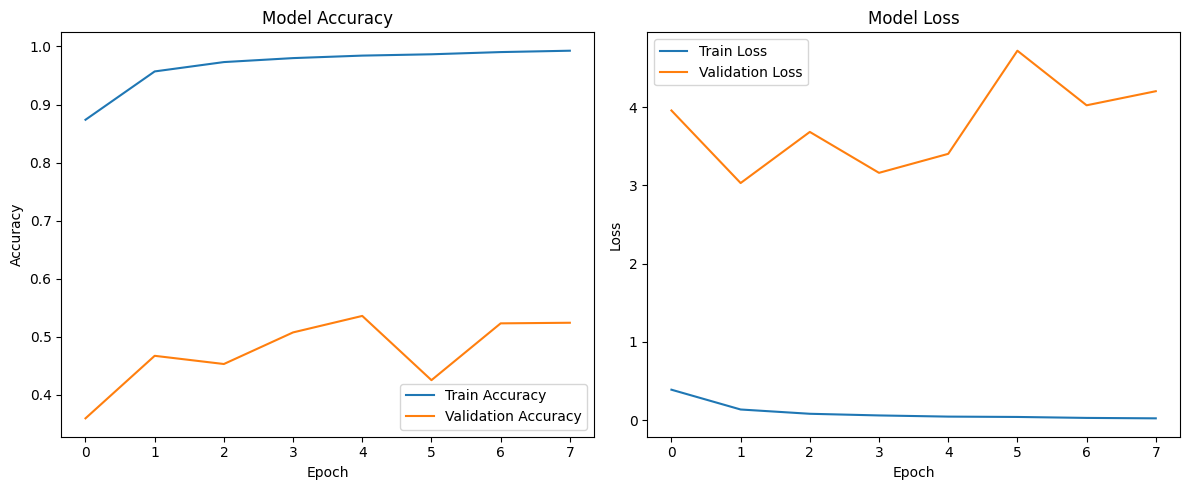

In [ ]:

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True),
    EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
]

history = model.fit(
    x_train_flat, y_train,
    batch_size=64,
    epochs=20,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()


Task 5: Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(x_test_flat, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 0.9830
Test Loss: 0.0695


Task 6: Save and Load the Model

In [ ]:
model.save('devanagari_fcn_model.h5')
print("Model saved as 'devanagari_fcn_model.h5'")

from tensorflow.keras.models import load_model
loaded_model = load_model('devanagari_fcn_model.h5')

loaded_test_loss, loaded_test_acc = loaded_model.evaluate(x_test_flat, y_test, verbose=0)
print(f"\nLoaded Model Test Accuracy: {loaded_test_acc:.4f}")
print(f"Loaded Model Test Loss: {loaded_test_loss:.4f}")

Model saved as 'devanagari_fcn_model.h5'

Loaded Model Test Accuracy: 0.9830
Loaded Model Test Loss: 0.0695


Task 7: Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


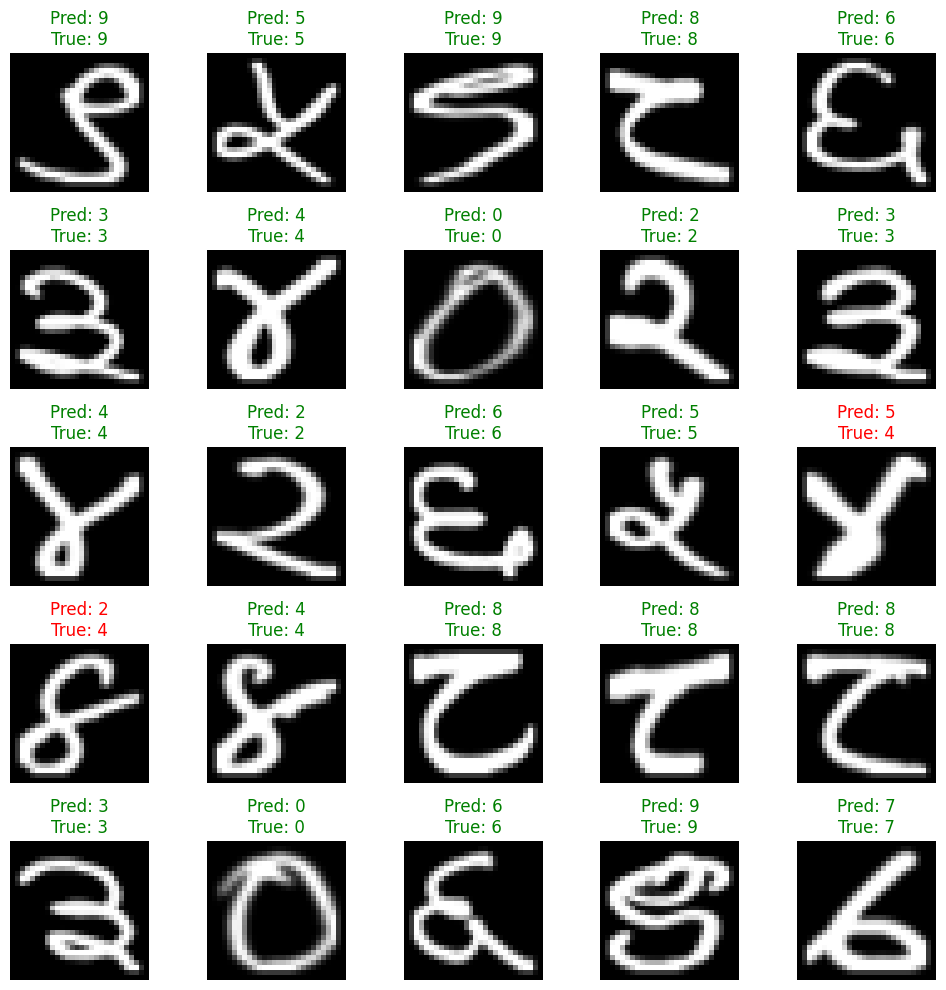


Prediction Accuracy on Samples: 23/25 (92.00%)


In [ ]:
sample_indices = np.random.choice(len(x_test_flat), 25, replace=False)
sample_images = x_test_flat[sample_indices]
sample_labels = y_test[sample_indices]

predictions = loaded_model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(sample_labels, axis=1)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()

correct = np.sum(predicted_labels == true_labels)
print(f"\nPrediction Accuracy on Samples: {correct}/25 ({correct/25:.2%})")